In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv("../data/drugs_train.csv")

In [3]:
train_df.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies,price
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),2.83
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE,14.30


In [4]:
train_df.shape

(8564, 14)

In [5]:
train_df.drug_id.nunique()

8564

In [6]:
train_df.administrative_status.value_counts()

Présentation active     8554
Présentation abrogée      10
Name: administrative_status, dtype: int64

In [7]:
train_df.marketing_status.value_counts()

Déclaration de commercialisation                                      7262
Déclaration d'arrêt de commercialisation                              1250
Arrêt de commercialisation (le médicament n'a plus d'autorisation)      51
Déclaration de suspension de commercialisation                           1
Name: marketing_status, dtype: int64

In [8]:
train_df.approved_for_hospital_use.value_counts()

oui    7022
non    1542
Name: approved_for_hospital_use, dtype: int64

In [9]:
train_df.reimbursement_rate.value_counts()

65%     7175
30%      656
15%      393
100%     339
0%         1
Name: reimbursement_rate, dtype: int64

In [10]:
train_df.dosage_form.value_counts().head(10)

comprimé pelliculé               1931
comprimé                         1017
comprimé sécable                  812
comprimé pelliculé sécable        669
gélule                            639
solution injectable               496
gélule gastro-résistant(e)        256
gélule à libération prolongée     175
comprimé gastro-résistant(e)      160
comprimé orodispersible           136
Name: dosage_form, dtype: int64

In [11]:
train_df.route_of_administration.value_counts()

orale                                                                                                         6948
cutanée                                                                                                        225
intraveineuse                                                                                                  224
sous-cutanée                                                                                                   177
ophtalmique                                                                                                    162
                                                                                                              ... 
intramusculaire,intrathécale,intraveineuse                                                                       1
intra-articulaire,périarticulaire,péridurale,voie parentérale autre                                              1
endocanalaire,intra-artérielle,intraveineuse                                    

In [12]:
train_df.marketing_authorization_status.value_counts()

Autorisation active      8169
Autorisation abrogée      314
Autorisation archivée      75
Autorisation retirée        6
Name: marketing_authorization_status, dtype: int64

In [13]:
train_df.pharmaceutical_companies.value_counts()

 TEVA SANTE               777
 SANOFI AVENTIS FRANCE    571
 MYLAN SAS                567
 BIOGARAN                 496
 SANDOZ                   456
                         ... 
 LABCATAL                   1
 GEDEON RICHTER             1
 LABORATOIRE UNITHER        1
 TERALI                     1
 LABORATOIRES DOLIAGE       1
Name: pharmaceutical_companies, Length: 325, dtype: int64

In [14]:
import numpy as np
import pandas as pd
df_y = np.log1p(train_df.price)

In [15]:
df_y.describe()

count    8564.000000
mean        2.441039
std         1.144582
min         0.470004
25%         1.597365
50%         2.190536
75%         3.050694
max         6.899108
Name: price, dtype: float64

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

NameError: name 'df_x' is not defined

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
mean_absolute_error(np.expm1(predicted), np.expm1(Y_test))

NameError: name 'predicted' is not defined

## XGBOOST

In [344]:
X, y = train_df.drop(columns=["price"]), train_df.price

In [345]:
X.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG)
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE


In [346]:
X.drug_id.nunique()

8564

In [347]:
X.columns

Index(['drug_id', 'description', 'administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate', 'dosage_form',
       'route_of_administration', 'marketing_authorization_status',
       'marketing_declaration_date', 'marketing_authorization_date',
       'marketing_authorization_process', 'pharmaceutical_companies'],
      dtype='object')

In [348]:
y.describe()

count    8564.000000
mean       28.530284
std        81.394061
min         0.600000
25%         3.940000
50%         7.940000
75%        20.130000
max       990.390000
Name: price, dtype: float64

In [349]:
X.head(3)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG)
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE
2,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,20000101,19960101,Procédure nationale,MYLAN SAS


In [350]:
X["marketing_declaration_date"] = pd.to_datetime(X.marketing_declaration_date, format="%Y%m%d")
X["marketing_authorization_date"] = pd.to_datetime(X.marketing_authorization_date, format="%Y%m%d")

X["marketing_days_elapsed"] = X["marketing_declaration_date"] - X["marketing_authorization_date"]
X["marketing_days_elapsed"] = abs(X["marketing_days_elapsed"].dt.days)

In [351]:
X["reimbursement_rate"] = X.reimbursement_rate.str.replace("%", "")
X["reimbursement_rate"] = X["reimbursement_rate"].astype(int)
X["reimbursement_rate"] /= 100

In [352]:
X.reimbursement_rate.head()

0    0.65
1    0.65
2    0.65
3    0.65
4    1.00
Name: reimbursement_rate, dtype: float64

In [353]:
X.administrative_status = X.administrative_status.apply(lambda x: 1 if "active" in x else 0)

In [354]:
X.approved_for_hospital_use = X.approved_for_hospital_use.apply(lambda x: 1 if "oui" in x else 0)

In [355]:
X["year"] = X.marketing_declaration_date.dt.year

In [335]:
X["pharmaceutical_companies"] =X["pharmaceutical_companies"].str.split(',')  

In [336]:
X = X.explode("pharmaceutical_companies")

In [337]:
X.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies,marketing_days_elapsed,year
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,Déclaration de commercialisation,1,0.65,comprimé pelliculé,orale,Autorisation active,2014-01-01,2014-01-01,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),0,2014
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,1,Déclaration de commercialisation,1,0.65,comprimé à croquer,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,TEVA SANTE,1461,2013


In [338]:
X.shape

(8566, 15)

In [356]:
#y_log = np.log1p(y)
y_log = (y - y.mean()) / y.std()

In [357]:
X = X.drop(columns=["drug_id", "description", 'marketing_declaration_date', 'marketing_authorization_date'])

In [358]:
dups = X[X.duplicated(keep=False)]

In [362]:
dups.reset_index(inplace=True)
y_bis = y.reset_index()

In [364]:
dups = dups.merge(y_bis)

In [366]:
dups.head(4)

,index,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_authorization_process,pharmaceutical_companies,marketing_days_elapsed,year,price
0,0,1,Déclaration de commercialisation,1,0.65,comprimé pelliculé,orale,Autorisation active,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),0,2014,2.83
1,2,1,Déclaration de commercialisation,1,0.65,gélule à libération prolongée,orale,Autorisation active,Procédure nationale,MYLAN SAS,1461,2000,5.66
2,3,1,Déclaration de commercialisation,1,0.65,granulés à libération prolongée,orale,Autorisation active,Procédure nationale,SANOFI AVENTIS FRANCE,366,2005,24.27
3,7,1,Déclaration de commercialisation,1,0.65,comprimé,orale,Autorisation active,Procédure de reconnaissance mutuelle,SANDOZ,0,2006,6.58


In [360]:
y

0         2.83
1        14.30
2         5.66
3        24.27
4        59.94
         ...  
8559     43.50
8560    781.37
8561      3.94
8562     14.21
8563      4.82
Name: price, Length: 8564, dtype: float64

In [243]:
X.drop_duplicates(inplace=True)

In [244]:
X.shape

(5583, 11)

In [240]:
X.columns

Index(['administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate', 'dosage_form',
       'route_of_administration', 'marketing_authorization_status',
       'marketing_authorization_process', 'pharmaceutical_companies',
       'marketing_days_elapsed', 'year'],
      dtype='object')

In [241]:
one_hot_columns = ["marketing_status", 
                   "marketing_authorization_status",
                   "marketing_authorization_process"
                  ]

high_dim_columns = ["dosage_form", "route_of_administration", "pharmaceutical_companies"]

bins_columns = ["marketing_days_elapsed"]
nums_columns = ["reimbursement_rate"]

In [181]:
## Random variable
n = len(X)
mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, n)
X["random"] = s

In [153]:
X.columns

Index(['administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate', 'dosage_form',
       'route_of_administration', 'marketing_authorization_status',
       'marketing_authorization_process', 'pharmaceutical_companies',
       'marketing_days_elapsed', 'year', 'random'],
      dtype='object')

In [182]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from category_encoders import MEstimateEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y_log, test_size = .20, random_state = 40)

In [183]:
X_train["price"] = Y_train
X_test["price"] = Y_test

In [184]:
for hdc in high_dim_columns:
    mean_price = X_train.groupby(hdc).price.mean()
    median_price = X_train.groupby(hdc).price.median()
    qauntile_75_price = X_train.groupby(hdc).price.quantile(0.75)
    
    X_train[hdc + "_mean"] = X_train[hdc].map(mean_price)
    X_test[hdc + "_mean"] = X_test[hdc].map(mean_price)
    X_test[hdc + "_mean"].fillna(median_price.mean(), inplace=True)
    #X_train[hdc + "_median"] = X_train[hdc].map(median_price)
    #X_test[hdc + "_median"] = X_test[hdc].map(median_price)
    #X_train[hdc + "_q75"] = X_train[hdc].map(qauntile_75_price)
    #X_test[hdc + "_q75"] = X_test[hdc].map(qauntile_75_price)
    


In [185]:
X_train.head(2)

,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_authorization_process,pharmaceutical_companies,marketing_days_elapsed,year,random,price,dosage_form_mean,route_of_administration_mean,pharmaceutical_companies_mean
2850,1,Déclaration de commercialisation,1,0.65,comprimé sécable,orale,Autorisation active,Procédure nationale,RATIOPHARM (ALLEMAGNE),4383,2014,0.048037,1.291984,2.033428,2.35611,2.303321
3258,1,Déclaration de commercialisation,1,1.00,poudre et solvant pour solution injectable,sous-cutanée,Autorisation active,Procédure de reconnaissance mutuelle,ASTELLAS PHARMA,365,2006,-0.006457,4.808274,4.108457,4.91321,2.178918


In [186]:
X_test.head(2)

,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_authorization_process,pharmaceutical_companies,marketing_days_elapsed,year,random,price,dosage_form_mean,route_of_administration_mean,pharmaceutical_companies_mean
3955,1,Déclaration de commercialisation,1,0.65,comprimé pelliculé sécable,orale,Autorisation active,Procédure de reconnaissance mutuelle,CHIESI,730,1992,-0.091842,2.297573,2.283879,2.35611,2.580888
5939,1,Déclaration de commercialisation,1,0.65,gélule,orale,Autorisation active,Procédure nationale,MYLAN SAS,8035,2015,-0.114097,2.455306,2.480157,2.35611,2.270858


In [187]:
len(X_test.columns) == len(X_train.columns)

True

In [188]:
corr = X_train.corr()

In [189]:
corr[(corr >= 0.85) & (corr < 1.0)]

,administrative_status,approved_for_hospital_use,reimbursement_rate,marketing_days_elapsed,year,random,price,dosage_form_mean,route_of_administration_mean,pharmaceutical_companies_mean
administrative_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approved_for_hospital_use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reimbursement_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketing_days_elapsed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dosage_form_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_of_administration_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pharmaceutical_companies_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
drop_columns = high_dim_columns + ["price"]
X_train.drop(columns=drop_columns, inplace=True)
X_test.drop(columns=drop_columns, inplace=True)

In [191]:
full_pipeline = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_columns), 
    ('bins', KBinsDiscretizer(n_bins=20, strategy='uniform', encode='ordinal'), bins_columns),
], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [192]:
model = RandomForestRegressor(random_state=2022, n_estimators=10, max_depth=7, n_jobs=-1)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, n_estimators=10, n_jobs=-1,
                      random_state=2022)

In [77]:
# train the model
model = XGBRegressor(n_estimators=10, max_depth=7, verbosity=1, reg_lambda=0.001, reg_alpha=0.1)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=0.001, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [194]:
from sklearn.metrics import mean_squared_error
d = {"train": [X_train, Y_train], "val": [X_test, Y_test]}
for k in d:
    print("*"*50)
    print(k)
    preds = np.expm1(model.predict(d[k][0]))
    truth = np.expm1(d[k][1])
    rmse = mean_squared_error(preds, truth, squared=False)
    print(f"rmse: {rmse}")


**************************************************
train
rmse: 48.30560046155937
**************************************************
val
rmse: 63.764568588539284


In [146]:
X_train[:, -4]

array([ 0.09172695,  0.06602025, -0.0201813 , ...,  0.24365119,
       -0.03880444, -0.06609945])

In [125]:
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [126]:
features = [f"f_{i}" for i in range(X_train.shape[1])]

In [ ]:
[21, 20, 16, 19]

<BarContainer object of 22 artists>

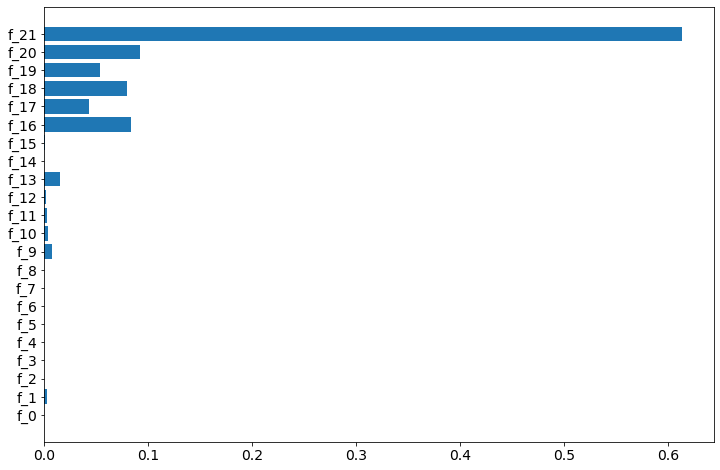

In [127]:
plt.barh(features, model.feature_importances_)

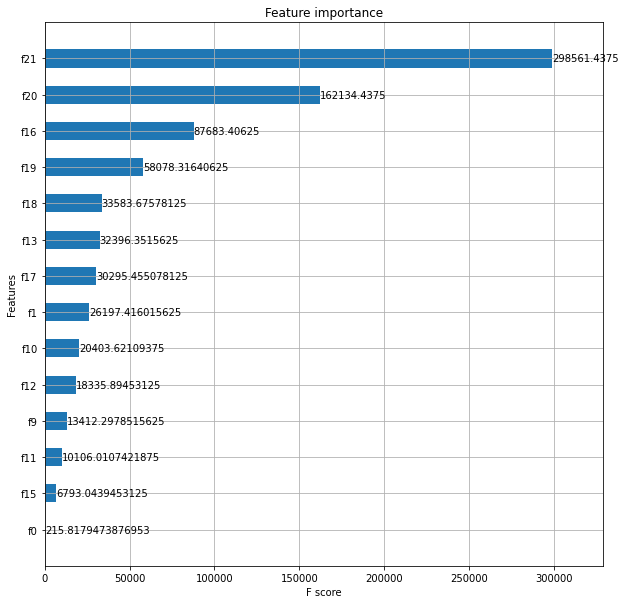

In [140]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.5, ax=ax,importance_type='gain')
plt.show()

In [147]:
new_X_train = X_train[:, [21, 20, 16, 19]]

In [149]:
new_X_test = X_test[:, [21, 20, 16, 19]]

In [148]:
new_X_train

array([[1.77090132e+01, 2.08816349e+01, 6.50000000e-01, 1.01361196e+01],
       [2.07358824e+01, 2.66686573e+02, 1.00000000e+00, 1.65023594e+02],
       [1.15983820e+01, 2.08816349e+01, 6.50000000e-01, 8.41980952e+00],
       ...,
       [1.29447642e+01, 2.08816349e+01, 6.50000000e-01, 8.41980952e+00],
       [1.58323171e+01, 3.40911111e+01, 6.50000000e-01, 2.11654054e+01],
       [1.55400228e+01, 2.08816349e+01, 1.50000000e-01, 3.05504272e+01]])

In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(new_X_train, Y_train)

LinearRegression()

In [153]:
# train the model
model = XGBRegressor(n_estimators=10, max_depth=7, verbosity=1, reg_lambda=0.001, reg_alpha=0.1)
model.fit(new_X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=0.001, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [154]:
from sklearn.metrics import mean_squared_error
d = {"train": [new_X_train, Y_train], "val": [new_X_test, Y_test]}
for k in d:
    print("*"*50)
    print(k)
    preds = model.predict(d[k][0])
    truth = d[k][1]
    rmse = mean_squared_error(preds, truth, squared=False)
    print(f"rmse: {rmse}")

**************************************************
train
rmse: 35.43221478785915
**************************************************
val
rmse: 58.873077097559054


In [93]:
X_train.shape

(6851, 28)

In [89]:
X.columns

Index(['administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate', 'dosage_form',
       'route_of_administration', 'marketing_authorization_status',
       'marketing_authorization_process', 'pharmaceutical_companies',
       'marketing_days_elapsed', 'year', 'random'],
      dtype='object')

In [158]:
X_train["price"] = Y_train

In [ ]:
np.expm1(X_train["price"] 

In [159]:
price_evolution = X_train[["year", "price"]].sort_values("year")

In [160]:
price_evolution_first = price_evolution[price_evolution.price <= 400]
price_evolution_second = price_evolution[price_evolution.price > 400]

In [161]:
import matplotlib.pyplot as plt

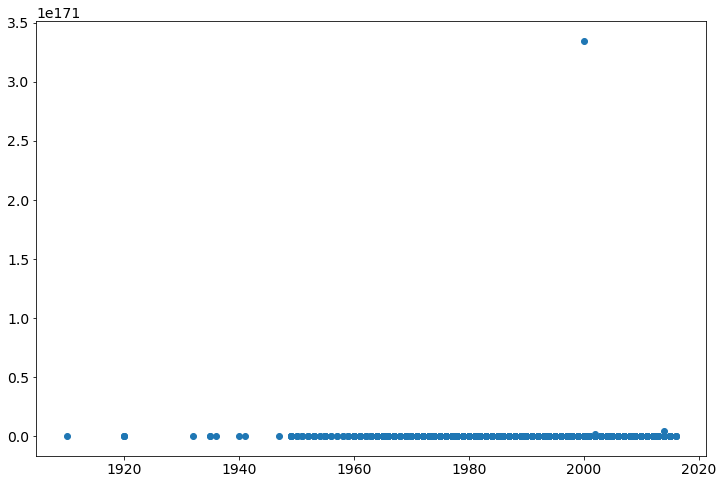

In [163]:
plt.scatter(price_evolution_first.year, np.expm1(price_evolution_first.price))

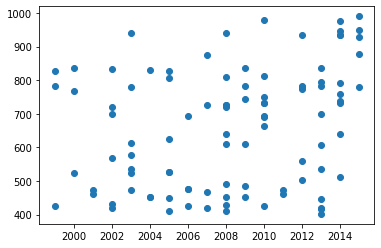

In [152]:
plt.scatter(price_evolution_second.marketing_declaration_date, price_evolution_second.price)

In [146]:
X_past = price_evolution[price_evolution.marketing_declaration_date <= "2018-01-01"]
X_future = price_evolution[price_evolution.marketing_declaration_date > "2018-01-01"]

In [238]:
features = pd.read_csv("drug_label_feature_eng.csv")

In [239]:
features.head(2)

,description,label_plaquette,label_ampoule,label_flacon,label_tube,label_stylo,label_seringue,label_pilulier,label_sachet,label_comprime,...,count_stylo,count_seringue,count_pilulier,count_sachet,count_comprime,count_gelule,count_film,count_poche,count_capsule,count_ml
0,12 sachet(s) papier aluminium polyéthylène de ...,0,0,0,0,0,0,0,1,0,...,0,0,0,12,0,0,0,0,0,0.0
1,plaquette(s) thermoformée(s) (ACLAR RX) polytr...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,28,0,0,0,0,0.0


In [243]:
for i, f in features.head(10).iterrows():
    print(f.description)
    print("="*10)

12 sachet(s) papier aluminium polyéthylène de 0,52  g
plaquette(s) thermoformée(s) (ACLAR RX) polytrifluorochloroéthylène de 28 comprimé(s) (distributeur parallèle : PHARMA LAB)
tube(s) polypropylène dioxyde de titane de 30 comprimé(s)
plaquette(s) thermoformée(s) polyamide aluminium PVC de 20 comprimé(s)
1 flacon(s) pressurisé(e)(s) aluminium de 120  dose(s) avec valve(s) doseuse(s) polypropylène
1 flacon(s) polyéthylène poudreur(se)(s) de 30  g
1 poche(s) polypropylène SIS : styrène-isoprène-styrène styrène éthylène butadiène suremballée(s)/surpochée(s) de 1000 ml avec site d'addition Luer Lock
plaquette(s) PVC-Aluminium de 100 comprimé(s)
flacon(s) en verre de 160 ml avec fermeture de sécurité avec seringue(s) pour administration orale polypropylène avec gobelet(s) doseur(s) polypropylène
2 seringue(s) préremplie(s) en verre de 0,8 ml


In [11]:
features.shape

(3010, 28)

In [367]:
ingredients = pd.read_csv("../data/active_ingredients.csv")

In [375]:
ingredients.head(5)

,drug_id,active_ingredient
0,0_train,DÉSOGESTREL
1,1_train,MONTÉLUKAST ACIDE
2,1_train,MONTÉLUKAST SODIQUE
3,2_train,CHLORHYDRATE DE DILTIAZEM
4,3_train,ACIDE VALPROÏQUE


In [377]:
ingredients["ing_count"] = ingredients.groupby("drug_id").active_ingredient.transform("nunique")

In [379]:
ingredients["price"] = ingredients.drug_id.map(train_df.set_index("drug_id").price)

In [381]:
ingredients["ing_price"] = ingredients.price / ingredients.ing_count

In [382]:
ingredients.head(5)

,drug_id,active_ingredient,ing_count,price,ing_price
0,0_train,DÉSOGESTREL,1,2.83,2.830
1,1_train,MONTÉLUKAST ACIDE,2,14.30,7.150
2,1_train,MONTÉLUKAST SODIQUE,2,14.30,7.150
3,2_train,CHLORHYDRATE DE DILTIAZEM,1,5.66,5.660
4,3_train,ACIDE VALPROÏQUE,2,24.27,12.135


In [388]:
ingredients.dropna(inplace=True)

In [389]:
ingredients.ing_count.max()

34

In [424]:
ingredients.active_ingredient.nunique()

2189

In [412]:
a = pd.DataFrame({"cuisine": ["c1", "c2", "c3"], "ingredients": [["ing1", "ing2", "ing3", "ing4"], 
                                                                 ["ing2", "ing4"], 
                                                                 ["ing2", "ing1", "ing3"]
                                                                ]
                 })

In [413]:
a['all_ingredients'] = a['ingredients'].map(";".join)

In [414]:
a

,cuisine,ingredients,all_ingredients
0,c1,"[ing1, ing2, ing3, ing4]",ing1;ing2;ing3;ing4
1,c2,"[ing2, ing4]",ing2;ing4
2,c3,"[ing2, ing1, ing3]",ing2;ing1;ing3


In [415]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(a['all_ingredients'].values)

In [416]:
X.toarray()

array([[1, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 0]])

In [417]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(a.cuisine)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [418]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
import numpy as np
def evaluate_cross_validation(X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))


In [419]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [420]:
logistic.predict(X_train)

array([2, 1])

In [421]:
y_train

array([2, 1])

In [422]:
logistic.predict(X_test)

array([2])

In [423]:
y_test

array([0])

In [14]:
test_df = pd.read_csv("drugs_test.csv")

In [15]:
test_df.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies
0,0_test,plaquette(s) thermoformée(s) polyamide alumini...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé gastro-résistant(e),orale,Autorisation active,20130101,20080101,Procédure de reconnaissance mutuelle,TEVA SANTE
1,1_test,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,Présentation active,Déclaration de commercialisation,non,30%,capsule,vaginale,Autorisation active,20120101,19970101,Procédure nationale,INNOTECH INTERNATIONAL


In [ ]:
# Year and companyfeature
mean_price = X_train.groupby("company_year").price.mean()
median_price = X_train.groupby("company_year").price.median()
qauntile_75_price = X_train.groupby("company_year").price.quantile(0.75)
X_train["company_year_mean"] = X_train["company_year"].map(mean_price)
X_test["company_year_mean"] = X_test["company_year"].map(mean_price)
X_train["company_year_median"] = X_train["company_year"].map(median_price)
X_test["company_year_median"] = X_test["company_year"].map(median_price)
X_train["company_year_q75"] = X_train["company_year"].map(qauntile_75_price)
X_test["company_year_q75"] = X_test["company_year"].map(qauntile_75_price)
